<a href="https://colab.research.google.com/github/KormazovaVer/Lab_4/blob/main/ML_MAI_%26_SBER_GD_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [2]:
data = pd.read_csv('autos.csv')

In [3]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


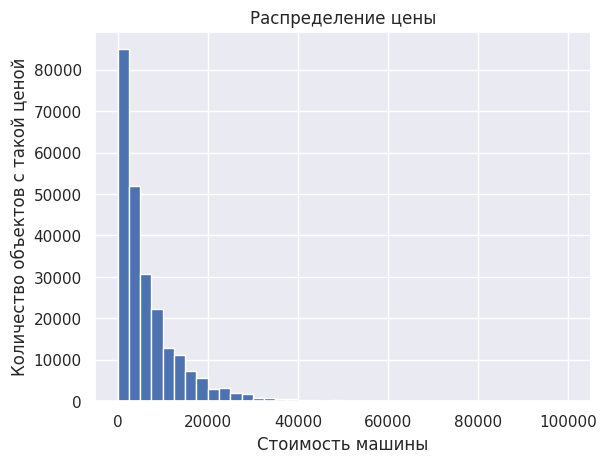

In [4]:
plt.hist(data['price'],bins = 40)
plt.xlabel('Стоимость машины')
plt.ylabel('Количество объектов с такой ценой')
plt.title('Распределение цены');

In [12]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


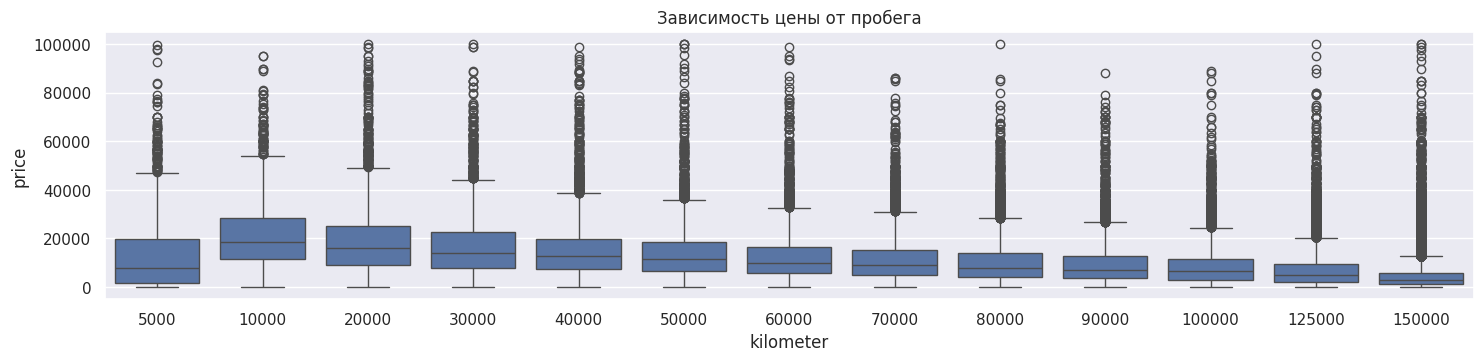

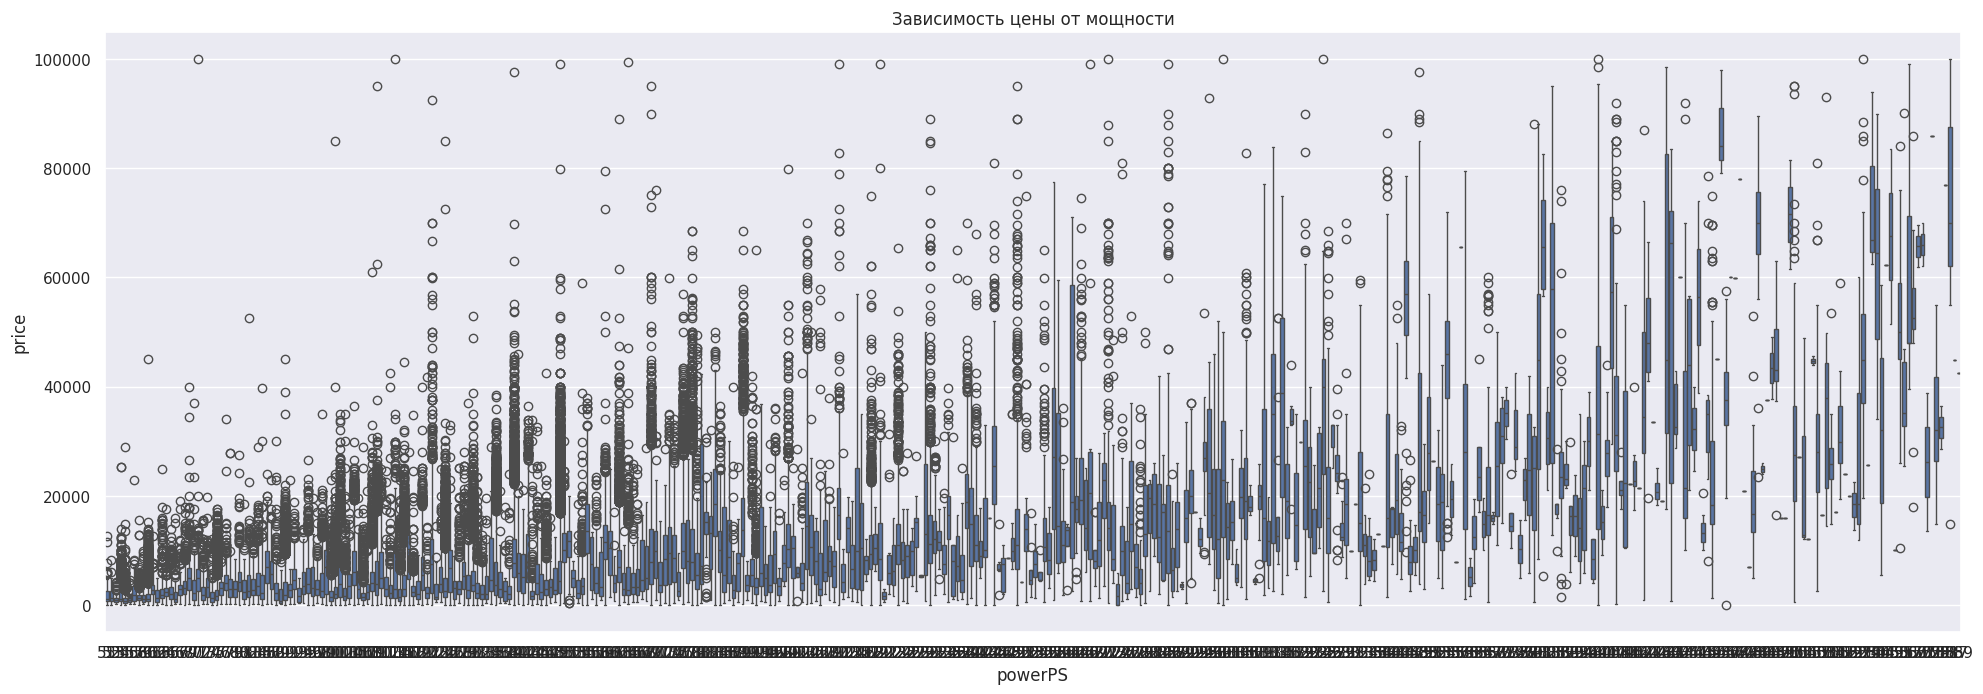

In [13]:
# Строим "ящики с усами"
plt.figure(figsize=(15, 10))

#kilometer
plt.subplot(3, 1, 1)
sns.boxplot(x='kilometer', y='price', data=data)
plt.title('Зависимость цены от пробега')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
#powerPS
plt.subplot(3, 1, 1)
sns.boxplot(x='powerPS', y='price', data=data)
plt.title('Зависимость цены от мощности')

plt.tight_layout()
plt.show()

 Между 75 квантилем и максимальным значением "price" очень большая разница, это свидетельствует о наличии выбросов. "Ящики с усами" демонстрируют большое количество выбросов.

In [5]:
data_new = data.drop(data[data['price']>data['price'].quantile(0.99)].index)

In [6]:
data_new['log_price'] = np.log1p(data_new['price'])

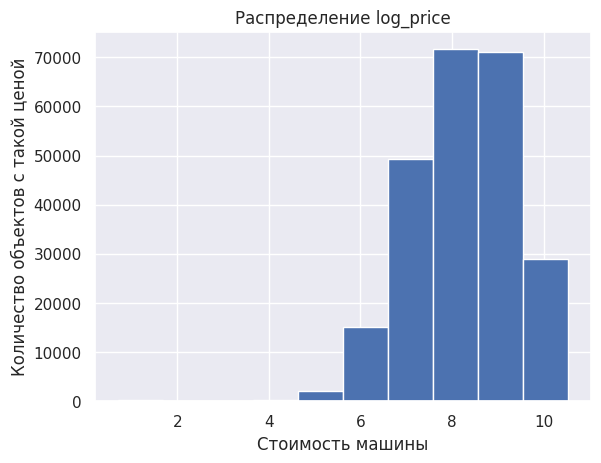

In [7]:
plt.hist(data_new['log_price'])
plt.xlabel('Стоимость машины')
plt.ylabel('Количество объектов с такой ценой')
plt.title('Распределение log_price');

In [8]:
data_new = data_new.drop(data_new.query('log_price < 6').index)

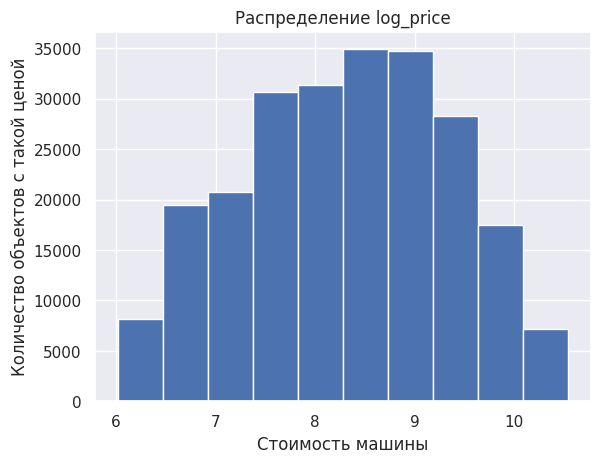

In [9]:
plt.hist(data_new['log_price'])
plt.xlabel('Стоимость машины')
plt.ylabel('Количество объектов с такой ценой')
plt.title('Распределение log_price');

Логарифмирование признака "price" может быть применено по 2 причинам:

1. Логарифмирование может помочь сделать распределение признака более нормальным и улучшить модель.

2. Логарифмирование может сделать данные менее чувствительными к выбросам и улучшить стабильность модели.

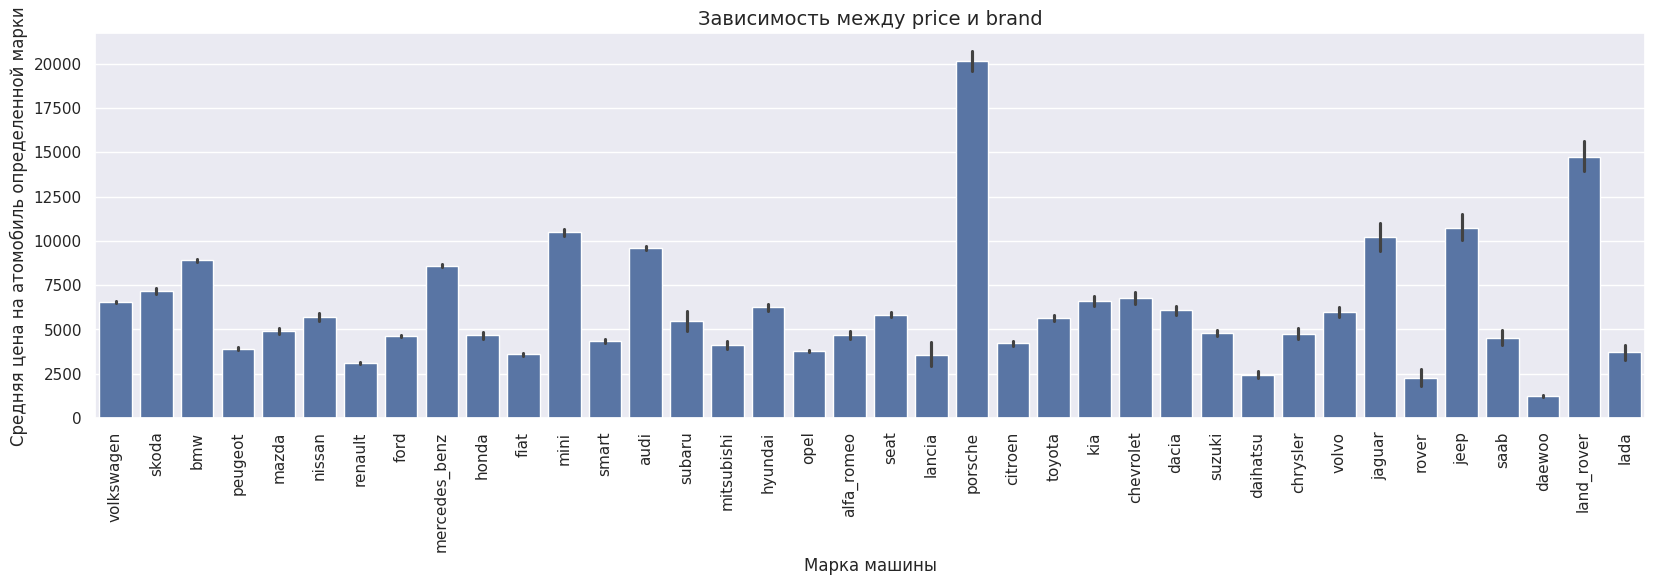

In [19]:
#brand
fig,ax = plt.subplots(figsize = (20,5))
sns.barplot(y = data_new['price'],x = data_new['brand'],ax = ax)
plt.xlabel('Марка машины',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль определенной марки',fontsize = 12)
plt.title('Зависимость между price и brand',fontsize = 14);

Самая дорогая марка -"porsche".

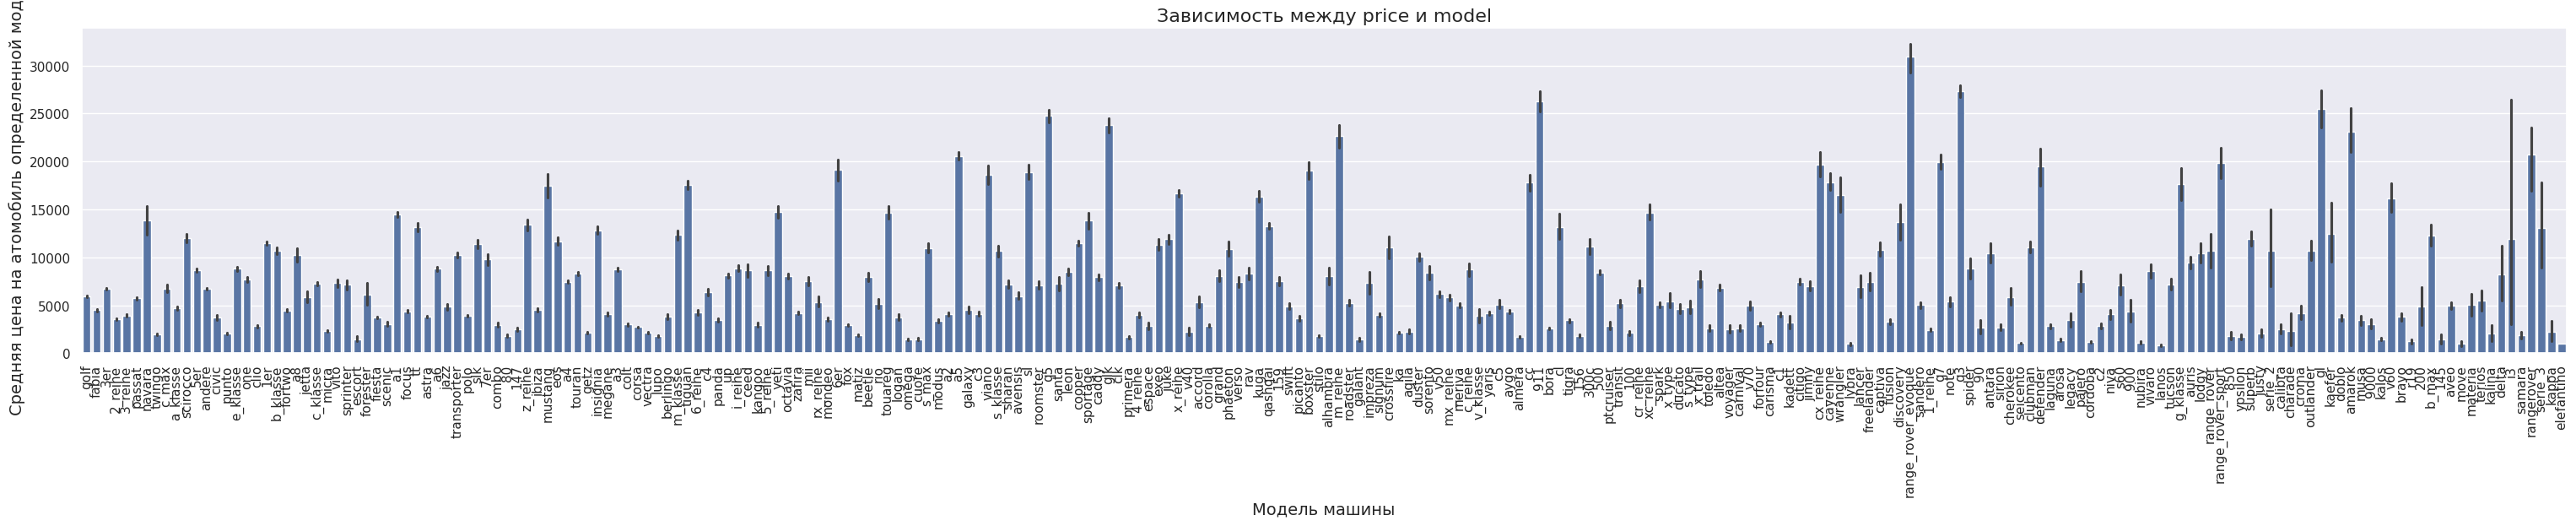

In [20]:
#model
fig,ax = plt.subplots(figsize = (38,5))
sns.barplot(y = data_new['price'],x = data_new['model'],ax= ax)
plt.xlabel('Модель машины',fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль определенной модели',fontsize = 14)
plt.title('Зависимость между price и model',fontsize = 16);

Есть ряд дорогих моделей: 911, range_rover_evoque, q3.

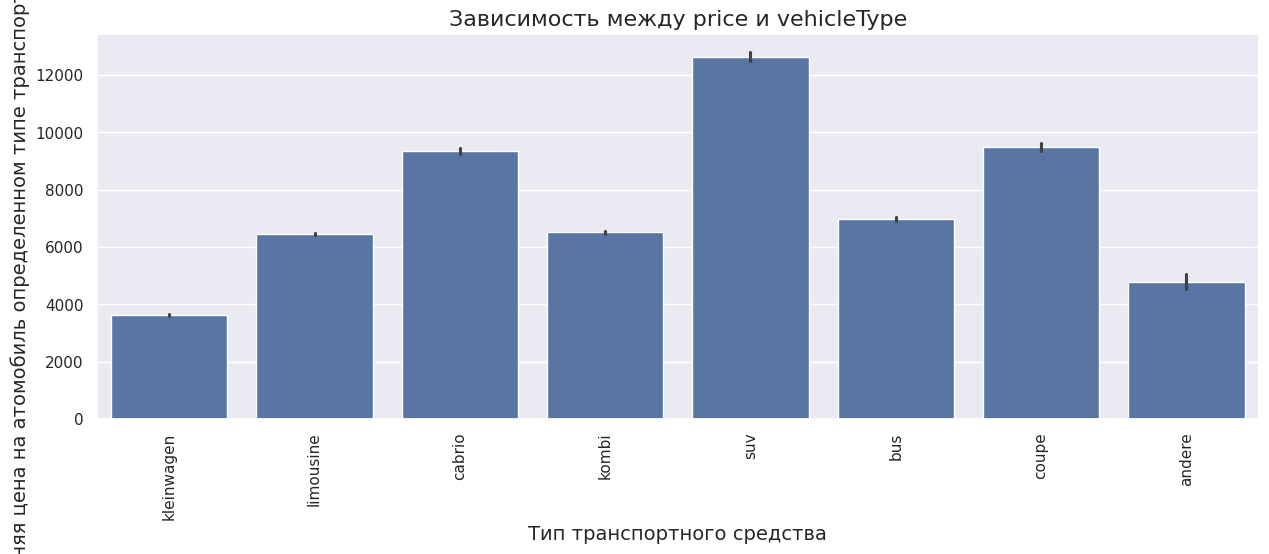

In [21]:
#vehicleType
fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(y = data_new['price'],x = data_new['vehicleType'],ax= ax)
plt.xlabel('Тип транспортного средства',fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль определенном типе транспортного средства',fontsize = 14)
plt.title('Зависимость между price и vehicleType',fontsize = 16);

Cамыми дорогими типами являются suv, cabrio и coupe.

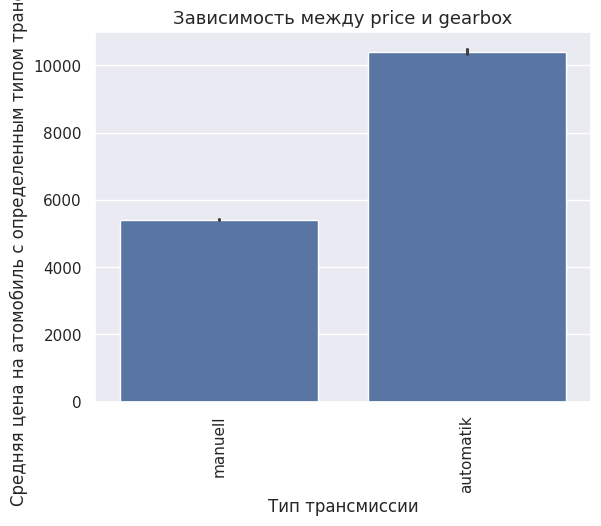

In [22]:
#gearbox
sns.barplot(y = data_new['price'],x = data_new['gearbox'])
plt.xlabel('Tип трансмисcии',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль c определенным типом трансмисcии',fontsize = 12)
plt.title('Зависимость между price и gearbox',fontsize = 13);

Наиболее дорогостоящая автоматическая коробка передач.

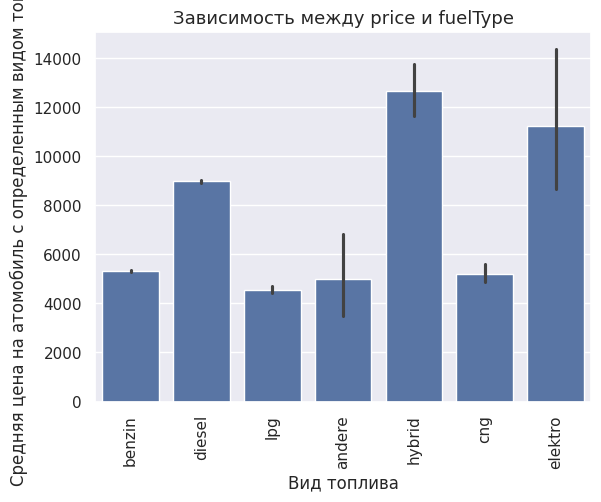

In [23]:
#fuelType
sns.barplot(y = data_new['price'],x = data_new['fuelType'])
plt.xlabel('Вид топлива',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль c определенным видом топлива',fontsize = 12)
plt.title('Зависимость между price и fuelType',fontsize = 13);

Cамые дорогостоящие автомобили на дизеле, гибридном топливе и электричестве.

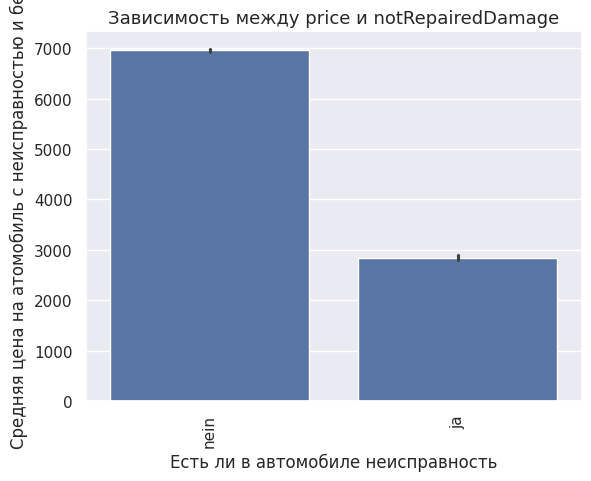

In [24]:
#notRepairedDamage
sns.barplot(y = data_new['price'],x = data_new['notRepairedDamage'])
plt.xlabel('Есть ли в автомобиле неисправность',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль c неисправностью и без',fontsize = 12)
plt.title('Зависимость между price и notRepairedDamage',fontsize = 13);

Исправные машины стоят более чем в 2 раза дороже.

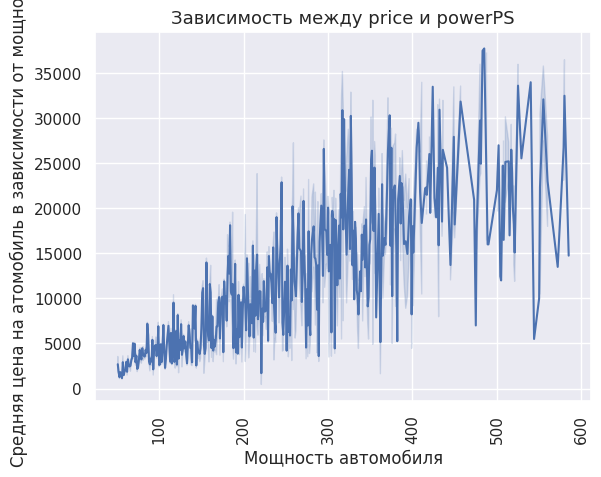

In [25]:
#powerPS
sns.lineplot(y = data_new['price'],x = data_new['powerPS'])
plt.xlabel('Мощность автомобиля',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль в зависимости от мощности',fontsize = 12)
plt.title('Зависимость между price и powerPS',fontsize = 13);

С ростом мощности растет и цена автомобилей, но не все мощные машины стоят дорого, это может быть связано с их пробегом, состоянием, брендом и маркой.

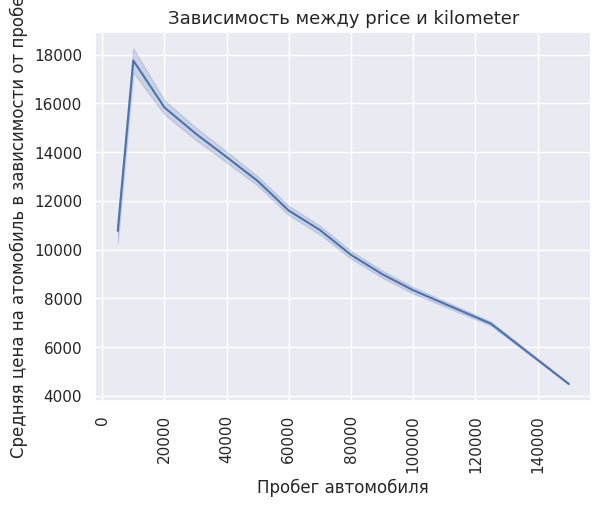

In [26]:
#kilometer
sns.lineplot(y = data_new['price'],x = data_new['kilometer'])
plt.xlabel('Пробег автомобиля',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль в зависимости от пробега',fontsize = 12)
plt.title('Зависимость между price и kilometer',fontsize = 13);

Можно наблюдать зависимость, чем больше пробег (после 20000 км), тем меньше цена авто.

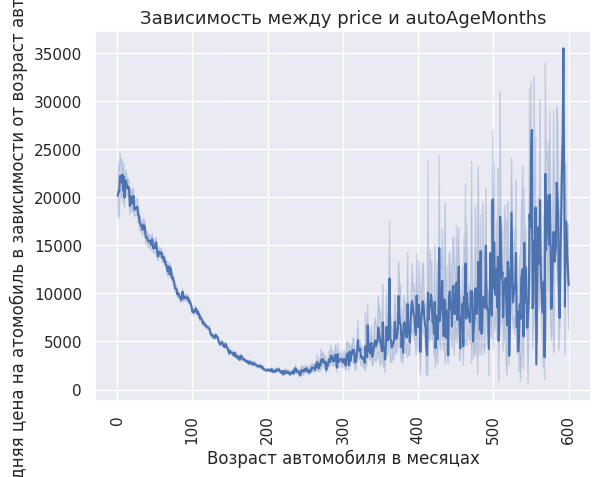

In [27]:
#autoAgeMonths
sns.lineplot(y = data_new['price'],x = data_new['autoAgeMonths'])
plt.xlabel('Возраст автомобиля в месяцах',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль в зависимости от возраст автомобиля',fontsize = 12)
plt.title('Зависимость между price и autoAgeMonths',fontsize = 13);

Примерно до 200 месяцев машина дешевеет, но потом она вероятно попадает в категорию раритета и начинает увеличиваться в цене.

In [10]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232960 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              232960 non-null  object 
 1   model              232960 non-null  object 
 2   vehicleType        232960 non-null  object 
 3   gearbox            232960 non-null  object 
 4   fuelType           232960 non-null  object 
 5   notRepairedDamage  232960 non-null  object 
 6   powerPS            232960 non-null  int64  
 7   kilometer          232960 non-null  int64  
 8   autoAgeMonths      232960 non-null  int64  
 9   price              232960 non-null  int64  
 10  log_price          232960 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 21.3+ MB


In [11]:
data_new = data_new.drop('log_price',axis =1)

In [12]:
data_new.loc[:,data_new.dtypes == np.dtype('object')]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage
0,volkswagen,golf,kleinwagen,manuell,benzin,nein
1,skoda,fabia,kleinwagen,manuell,diesel,nein
2,bmw,3er,limousine,manuell,benzin,ja
3,peugeot,2_reihe,cabrio,manuell,benzin,nein
4,mazda,3_reihe,limousine,manuell,benzin,nein
...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein
241186,seat,leon,limousine,manuell,benzin,ja
241187,smart,fortwo,cabrio,automatik,benzin,nein
241188,volkswagen,transporter,bus,manuell,diesel,nein


In [13]:
categorical = []
numeric = []
other = []

categorical.extend(data_new.loc[:, data_new.dtypes == np.dtype('object')].columns)
numeric.extend(data_new.loc[:, data_new.dtypes != np.dtype('object')].columns)

print(categorical)
print(numeric)
print(other)

['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
['powerPS', 'kilometer', 'autoAgeMonths', 'price']
[]


In [14]:
x = data_new[categorical + numeric + other]
y = data_new['price']
x['bias'] = 1
other += ['bias']

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232960 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              232960 non-null  object
 1   model              232960 non-null  object
 2   vehicleType        232960 non-null  object
 3   gearbox            232960 non-null  object
 4   fuelType           232960 non-null  object
 5   notRepairedDamage  232960 non-null  object
 6   powerPS            232960 non-null  int64 
 7   kilometer          232960 non-null  int64 
 8   autoAgeMonths      232960 non-null  int64 
 9   price              232960 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 19.6+ MB


In [17]:
from sklearn.model_selection import train_test_split
# Разделим выборку на трейн и тест, чтобы предсказать по среднему
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(x,y,test_size = 0.1,random_state = 42)
# Разделим выборку на трейн и тест, чтобы предсказать по среднему
(X_train,
 X_valid,
 y_train,
 y_valid) = train_test_split(X_train,y_train,test_size = 0.1,random_state = 42)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [18]:
from sklearn.metrics import r2_score

In [19]:
import itertools
from tqdm import tqdm
X_train = pd.DataFrame(data = X_train.todense())
X_test = pd.DataFrame(data = X_test.todense())
X_valid = pd.DataFrame(data = X_valid.todense())

In [20]:
demension_compare = X_valid.shape[1]
compare_approach = pd.DataFrame(columns = ['name','train_score','valid_score','test_score',"lambda",'r2_train', 'r2_valid','last_iter'])
counter = 0
for name, lambda_ in tqdm(itertools.product([ 'stochastic', 'momentum', 'adam','full'],
                                       np.logspace(-1,-6,3))):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': demension_compare,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)
    regression = regression.fit(X_train,y_train)
    train_loss = regression.calc_loss(X_train,y_train)
    valid_loss = regression.calc_loss(X_valid,y_valid)
    test_loss = regression.calc_loss(X_test,y_test)
    r2_score_train = r2_score(y_train,regression.predict(X_train))
    r2_score_valid = r2_score(y_valid,regression.predict(X_valid))
    last_iter = 120 - regression.max_iter
    compare_approach.loc[counter] = [name,train_loss,valid_loss,test_loss,lambda_,r2_score_train,r2_score_valid,last_iter]
    counter += 1


12it [35:58, 179.84s/it]


In [42]:
compare_approach

,name,train_score,valid_score,test_score,lambda,r2_train,r2_valid,last_iter
0,stochastic,8.543675e+07,7.917107e+07,8.524405e+07,0.100000,0.990040,0.990085,120
1,stochastic,8.231135e+07,8.073563e+07,8.297795e+07,0.000316,-0.799936,-0.804788,120
2,stochastic,8.757289e+07,8.591770e+07,8.814044e+07,0.000001,-1.000604,-1.005818,-173
3,momentum,8.729239e+07,8.057780e+07,8.674595e+07,0.100000,0.999897,0.999902,120
4,momentum,6.023738e+07,5.844913e+07,6.130483e+07,0.000316,0.250689,0.247743,120
5,momentum,8.737672e+07,8.572393e+07,8.794708e+07,0.000001,-0.993815,-0.999021,120
6,adam,8.726531e+07,8.561344e+07,8.783557e+07,0.100000,-0.990951,-0.996141,120
7,adam,8.758643e+07,8.593054e+07,8.815343e+07,0.000316,-1.001034,-1.006245,-179
8,adam,8.757381e+07,8.591764e+07,8.814145e+07,0.000001,-1.000575,-1.005790,-179
9,full,8.517454e+07,7.885069e+07,8.507194e+07,0.100000,0.989655,0.989673,120


In [23]:
compare_approach

,name,train_score,valid_score,test_score,lambda,r2_train,r2_valid,last_iter
0,stochastic,8.538008e+07,7.911274e+07,8.520291e+07,0.100000,0.989971,0.990013,300
1,stochastic,8.229762e+07,8.072212e+07,8.296383e+07,0.000316,-0.799594,-0.804446,300
2,stochastic,8.757174e+07,8.591630e+07,8.813951e+07,0.000001,-1.000498,-1.005714,9
3,momentum,8.729238e+07,8.057793e+07,8.674584e+07,0.100000,0.999897,0.999902,300
4,momentum,6.023825e+07,5.844977e+07,6.130626e+07,0.000316,0.250879,0.247934,300
5,momentum,8.739531e+07,8.574202e+07,8.796564e+07,0.000001,-0.994182,-0.999382,300
6,adam,8.727298e+07,8.562138e+07,8.784314e+07,0.100000,-0.991177,-0.996368,300
7,adam,8.756552e+07,8.590941e+07,8.813330e+07,0.000316,-1.000316,-1.005524,1
8,adam,8.756836e+07,8.591181e+07,8.813576e+07,0.000001,-1.000617,-1.005831,1
9,full,8.517469e+07,7.885063e+07,8.507229e+07,0.100000,0.989653,0.989671,300


### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [39]:
loss_histiries = {}
for name, lambda_ in tqdm(zip([ 'stochastic', 'momentum', 'adam','full'],[0.1,0.1,0.1,0.1])):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': demension_compare,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)
    regression = regression.fit(X_train,y_train)
    loss_histiries[name]= regression.loss_history

4it [18:21, 275.37s/it]


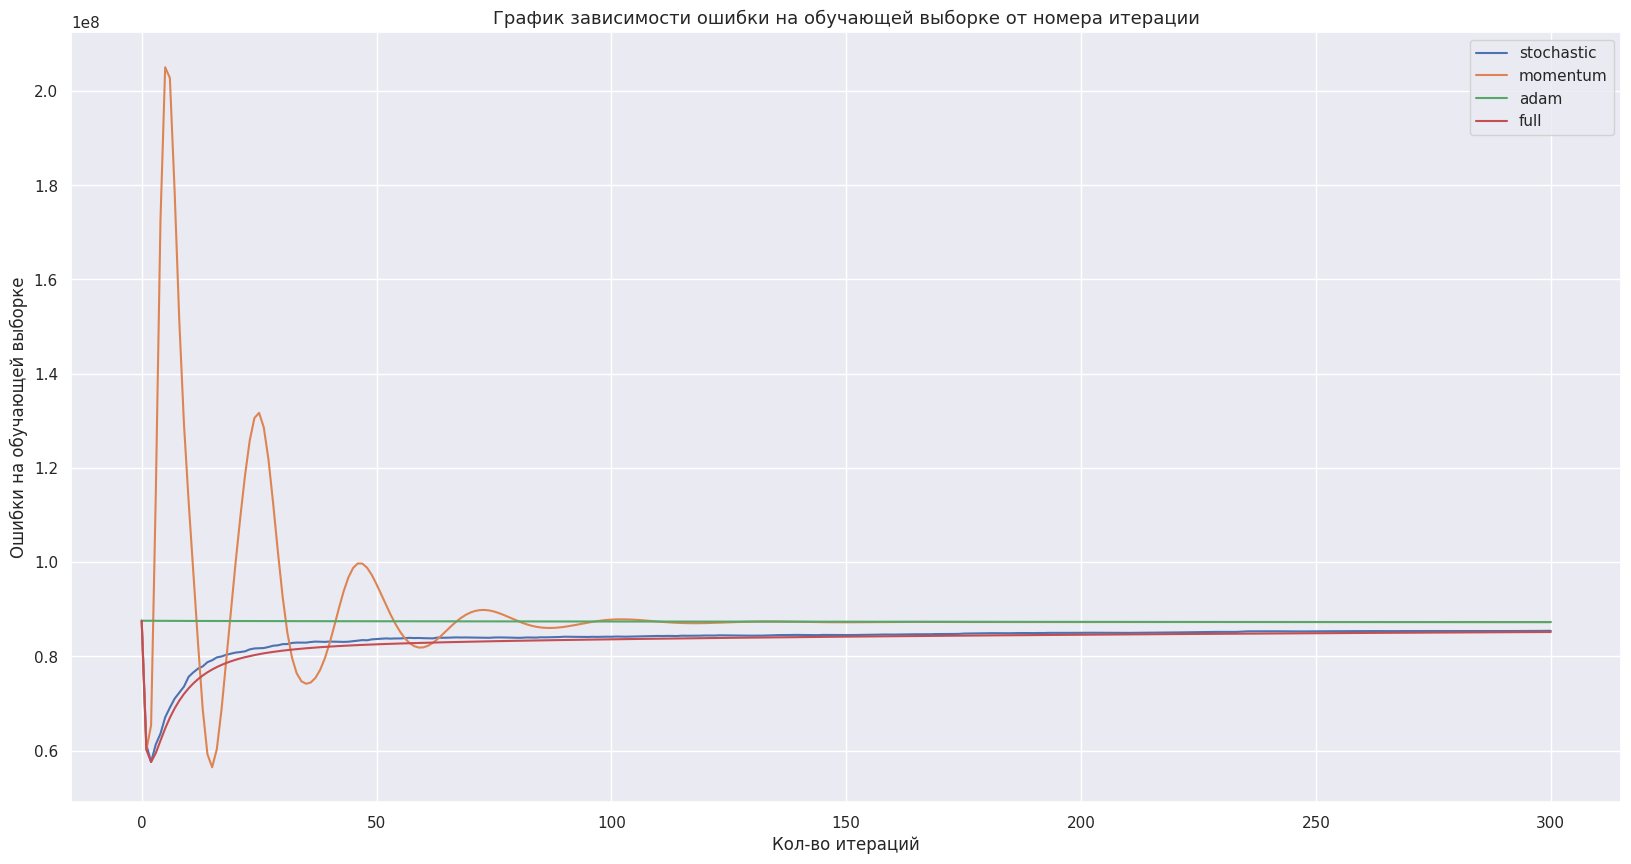

In [40]:
fig, ax = plt.subplots(figsize = (20,10))
for name,line in loss_histiries.items():
    ax.plot(line,label= name )
# plt.xlim((0,100))
ax.legend()
plt.xlabel('Кол-во итераций',fontsize = 12)
plt.ylabel('Ошибки на обучающей выборке',fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера итерации',fontsize = 13);

Общий вывод может быть следующим: значения R2, находящиеся вблизи 1.0, указывают на хорошее качество предсказания, в то время как отрицательные значения могут свидетельствовать о проблемах с моделью или данными. Этот диапазон значений также указывает на важность дополнительного анализа результатов, возможно, с применением других метрик, чтобы лучше понять производительность каждой модели.
При lambda=0.1 и 120 итерациях три модели имеют отличный результат R2, близкий к 1.0 (stochastic, full, momentum).  Модель adam имеет отрицательный R2, что говорит о плохом качестве модели.


## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [25]:
import time

In [26]:
batch_sizes = np.arange(5, 500, 10)
mean_time = []
mean_iter = []
for batch in tqdm(batch_sizes):
    for i in range(2):
        seq_time = []
        seq_iter = []
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': demension_compare,
                'batch_size': batch
            }
        }

        regression = LinearRegression(
            descent_config=descent_config)
        start = time.time()
        regression = regression.fit(X_train,y_train)
        seq_time += [time.time() - start]
        seq_iter += [300 - regression.max_iter]
    mean_time += [np.mean(seq_time)]
    mean_iter += [np.mean(seq_iter)]

100%|██████████| 50/50 [1:00:15<00:00, 72.30s/it]


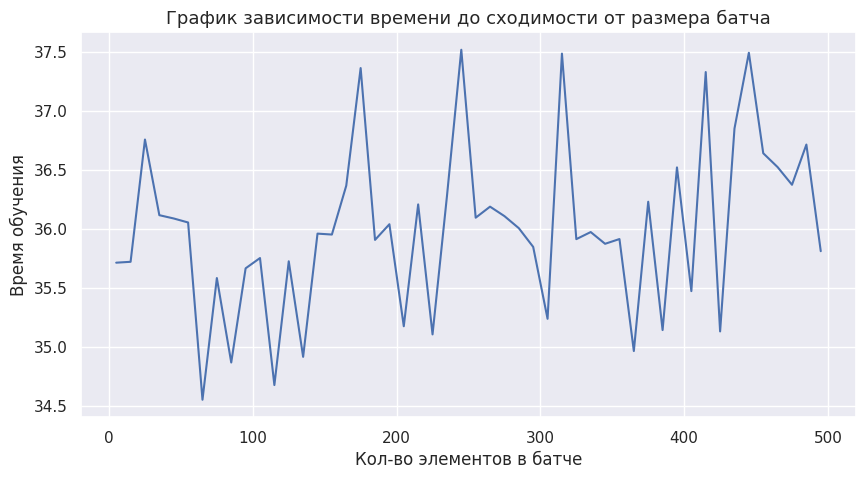

In [27]:
fig,ax = plt.subplots(figsize = (10,5))
sns.lineplot(y = mean_time,x = batch_sizes,ax =ax)
plt.xlabel('Кол-во элементов в батче',fontsize = 12)
plt.ylabel('Время обучения',fontsize = 12)
plt.title('График зависимости времени до сходимости от размера батча',fontsize = 13);

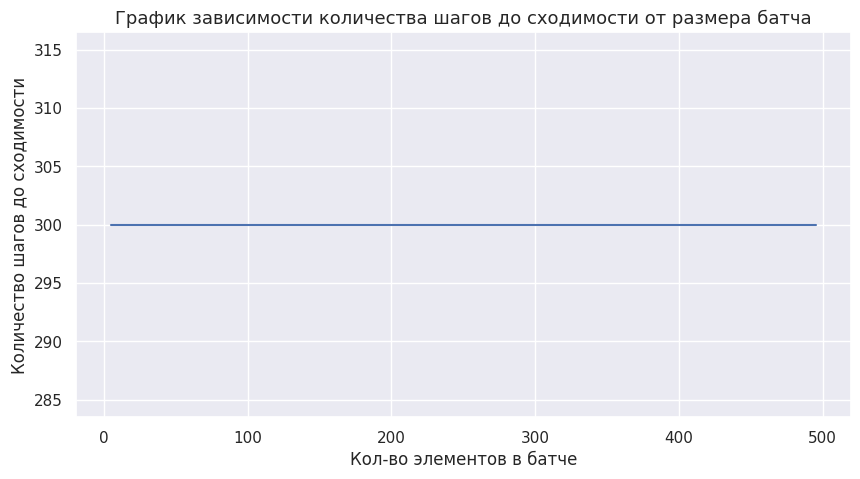

In [45]:
fig,ax = plt.subplots(figsize = (10,5))
sns.lineplot(y = mean_iter,x = batch_sizes,ax =ax)
plt.xlabel('Кол-во элементов в батче',fontsize = 12)
plt.ylabel('Количество шагов до сходимости',fontsize = 12)
plt.title('График зависимости количества шагов до сходимости от размера батча',fontsize = 13);

Размер батча влияет на скорость обучения и эффективность процесса градиентного спуска.

С увеличением размера батча обучение обычно ускоряется, так как модель обновляется реже, что уменьшает вычислительную нагрузку. Однако это может привести к уменьшению точности обновлений весов модели, что в свою очередь может замедлить сходимость и снизить качество модели.

С другой стороны, слишком маленький размер батча может привести к увеличению времени обучения из-за частых обновлений весов модели и увеличения вычислительной нагрузки. Также при маленьком размере батча может возникнуть проблема переобучения, особенно на маленьком объеме данных.

По полученным графикам не заметно сильного влияние размера батча на количество шагов до сходимости и на время сходимости. При малом размере батча время сходимости даже быстрее.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [28]:
demension_compare = X_valid.shape[1]
compare_approach_reg = pd.DataFrame(columns = ['name','train_score','valid_score','test_score',"lambda",'mu','r2_train','r2_valid','r2_test','last_iter'])
counter = 0
for name, lambda_,mu in tqdm(itertools.product(['stochastic', 'momentum', 'adam','full'],
                                       np.logspace(-1,-6,3),np.logspace(-1,0,3))):
    descent_config = {
        'regularized': True,
        'descent_name': name,
        'kwargs': {
            'dimension': demension_compare,
            'lambda_': lambda_,
            'mu':mu
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)
    regression = regression.fit(X_train,y_train)
    train_loss = regression.calc_loss(X_train,y_train)
    valid_loss = regression.calc_loss(X_valid,y_valid)
    test_loss = regression.calc_loss(X_test,y_test)
    r2_score_train = r2_score(y_train,regression.predict(X_train))
    r2_score_valid = r2_score(y_valid,regression.predict(X_valid))
    r2_score_test = r2_score(y_test,regression.predict(X_test))
    last_iter = 300 - regression.max_iter
    compare_approach_reg.loc[counter] = [name,train_loss,valid_loss,test_loss,lambda_,mu,r2_score_train,r2_score_valid,r2_score_test,last_iter]
    counter += 1

36it [1:48:06, 180.17s/it]


In [29]:
loss_histiries_re = {}
for name, lambda_ in tqdm(zip([ 'stochastic', 'momentum', 'adam','full'],[0.1,0.1,0.1,0.1])):
    descent_config = {
        'regularized': True,
        'descent_name': name,
        'kwargs': {
            'dimension': demension_compare,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)
    regression = regression.fit(X_train,y_train)
    loss_histiries_re[name]= regression.loss_history

4it [18:09, 272.50s/it]


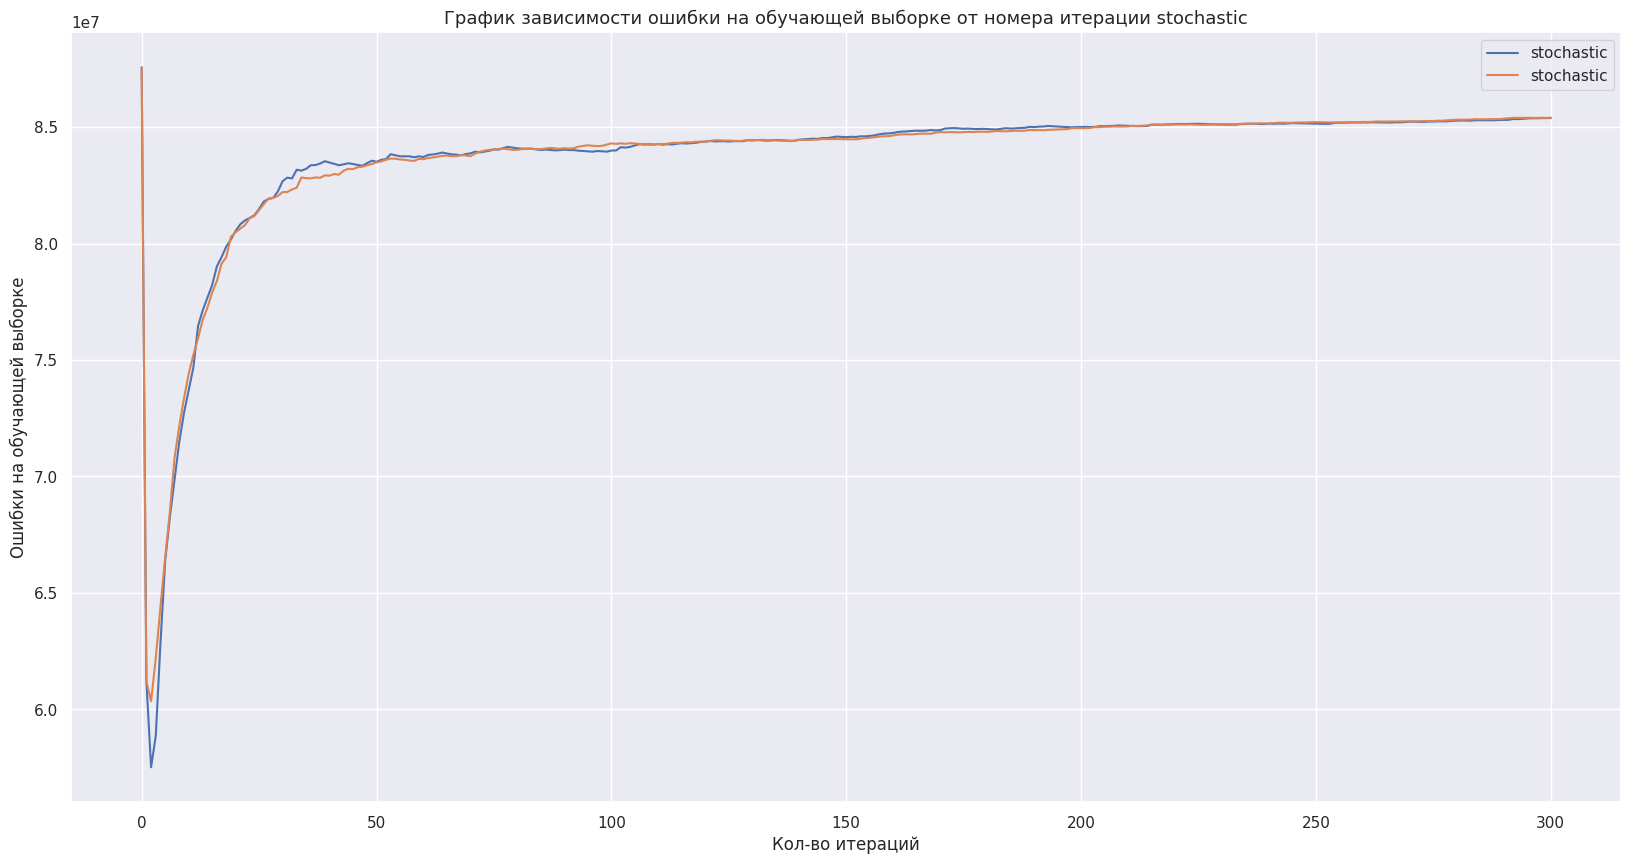

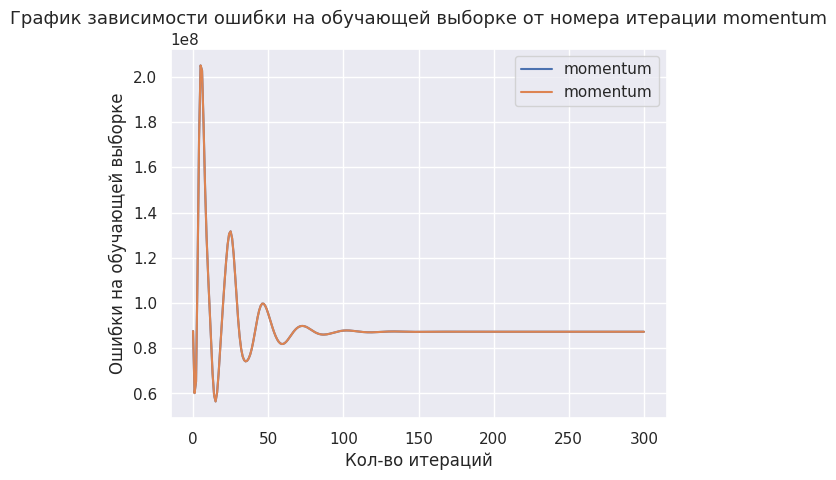

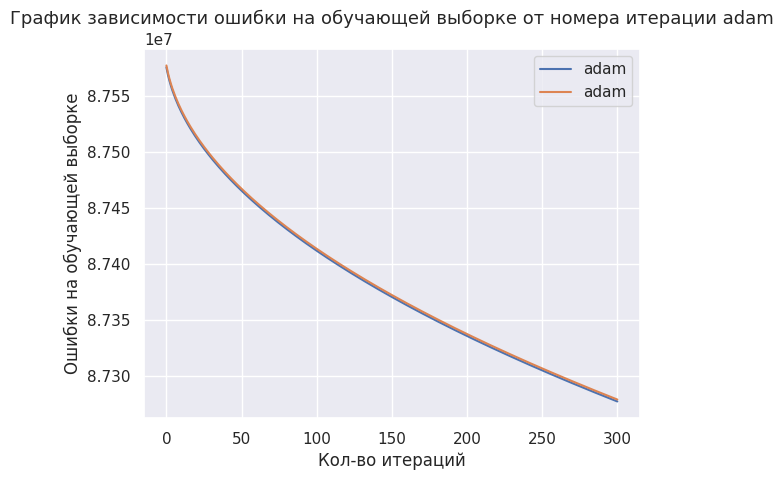

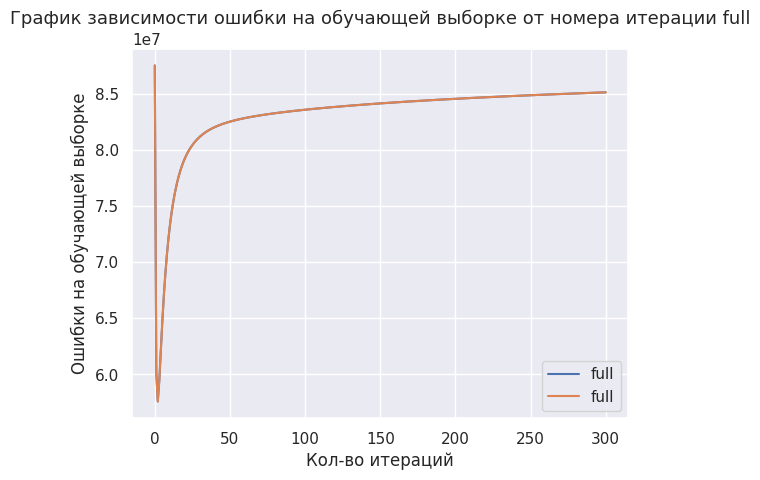

In [30]:
fig, ax = plt.subplots(figsize = (20,10))
for  nonreg,reg in zip(loss_histiries.items(),loss_histiries_re.items()):
    name,line = nonreg
    name_reg,line_reg = reg
    plt.plot(line,label= name )
    ax.legend()
    plt.xlabel('Кол-во итераций', fontsize = 12)
    plt.ylabel('Ошибки на обучающей выборке', fontsize = 12)
    plt.title(f"График зависимости ошибки на обучающей выборке от номера итерации {name_reg}", fontsize = 13)
    plt.plot(line_reg,label= name_reg )
    plt.legend()
    plt.show()


In [31]:
compare_approach_reg

,name,train_score,valid_score,test_score,lambda,mu,r2_train,r2_valid,r2_test,last_iter
0,stochastic,8.535828e+07,7.910155e+07,8.516519e+07,0.100000,0.100000,0.990027,0.990072,0.990327,300
1,stochastic,8.542789e+07,7.916165e+07,8.523267e+07,0.100000,0.316228,0.990055,0.990099,0.990353,300
2,stochastic,8.539230e+07,7.912936e+07,8.520179e+07,0.100000,1.000000,0.990016,0.990058,0.990318,300
3,stochastic,8.231414e+07,8.073734e+07,8.297620e+07,0.000316,0.100000,-0.802134,-0.806988,-0.792611,300
4,stochastic,8.232360e+07,8.074670e+07,8.298664e+07,0.000316,0.316228,-0.802183,-0.807037,-0.792654,300
5,stochastic,8.229454e+07,8.071922e+07,8.296122e+07,0.000316,1.000000,-0.799263,-0.804116,-0.789730,300
6,stochastic,8.757219e+07,8.591600e+07,8.814023e+07,0.000001,0.100000,-1.000419,-1.005626,-0.989251,7
7,stochastic,8.755428e+07,8.589876e+07,8.812165e+07,0.000001,0.316228,-1.000075,-1.005286,-0.988915,7
8,stochastic,8.756897e+07,8.591353e+07,8.813613e+07,0.000001,1.000000,-1.000341,-1.005551,-0.989171,8
9,momentum,8.729238e+07,8.057788e+07,8.674589e+07,0.100000,0.100000,0.999897,0.999902,0.999901,300


In [32]:
compare_approach_reg['reg'] = 'regularized'

In [33]:
total_compare = pd.concat([compare_approach,compare_approach_reg])
total_compare['mu'].fillna('none',inplace = True)
total_compare['reg'].fillna('no regularize',inplace = True)

In [34]:
total_compare

,name,train_score,valid_score,test_score,lambda,r2_train,r2_valid,last_iter,mu,r2_test,reg
0,stochastic,8.538008e+07,7.911274e+07,8.520291e+07,0.100000,0.989971,0.990013,300,none,NaN,no regularize
1,stochastic,8.229762e+07,8.072212e+07,8.296383e+07,0.000316,-0.799594,-0.804446,300,none,NaN,no regularize
2,stochastic,8.757174e+07,8.591630e+07,8.813951e+07,0.000001,-1.000498,-1.005714,9,none,NaN,no regularize
3,momentum,8.729238e+07,8.057793e+07,8.674584e+07,0.100000,0.999897,0.999902,300,none,NaN,no regularize
4,momentum,6.023825e+07,5.844977e+07,6.130626e+07,0.000316,0.250879,0.247934,300,none,NaN,no regularize
5,momentum,8.739531e+07,8.574202e+07,8.796564e+07,0.000001,-0.994182,-0.999382,300,none,NaN,no regularize
6,adam,8.727298e+07,8.562138e+07,8.784314e+07,0.100000,-0.991177,-0.996368,300,none,NaN,no regularize
7,adam,8.756552e+07,8.590941e+07,8.813330e+07,0.000316,-1.000316,-1.005524,1,none,NaN,no regularize
8,adam,8.756836e+07,8.591181e+07,8.813576e+07,0.000001,-1.000617,-1.005831,1,none,NaN,no regularize
9,full,8.517469e+07,7.885063e+07,8.507229e+07,0.100000,0.989653,0.989671,300,none,NaN,no regularize


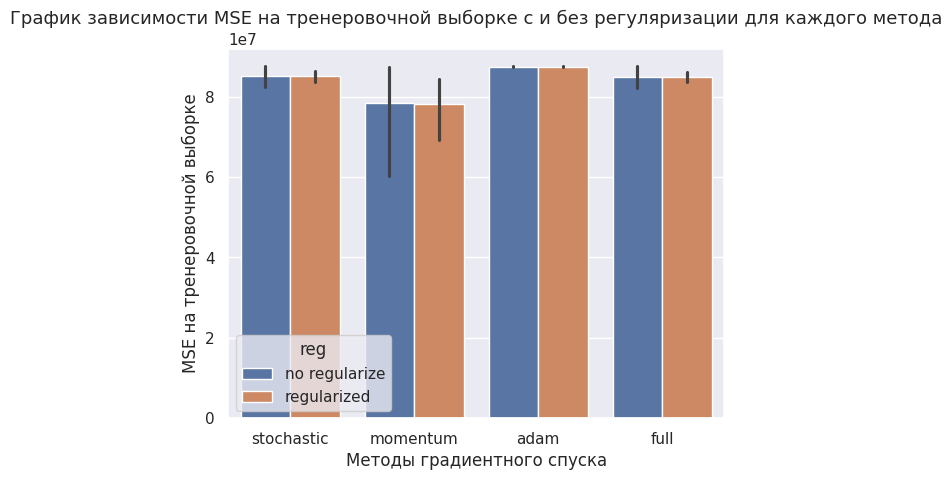

In [35]:
sns.barplot(data=total_compare, x= 'name',y = 'train_score',hue = 'reg')
plt.xlabel('Методы градиентного спуска',fontsize = 12)
plt.ylabel('MSE на тренеровочной выборке',fontsize = 12)
plt.title('График зависимости MSE на тренеровочной выборке с и без регуляризации для каждого метода',fontsize = 13);

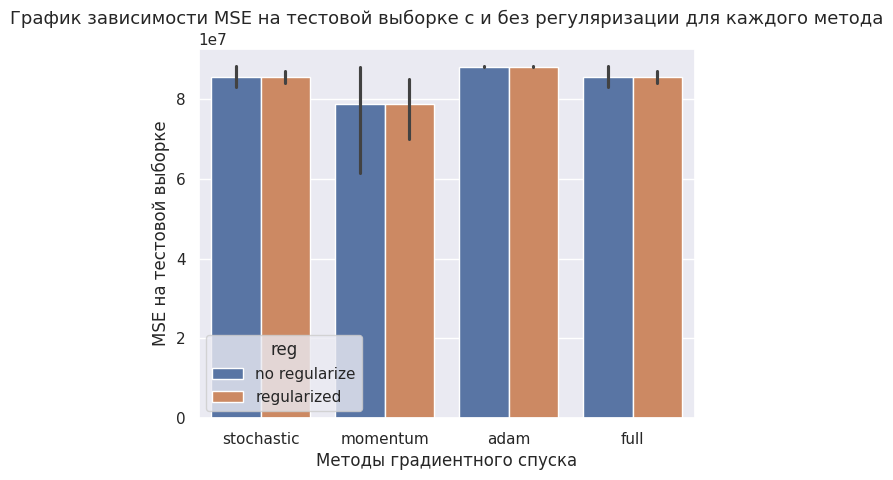

In [36]:

sns.barplot(data=total_compare, x= 'name', y = 'test_score',hue = 'reg')
plt.xlabel('Методы градиентного спуска',fontsize = 12)
plt.ylabel('MSE на тестовой выборке',fontsize = 12)
plt.title('График зависимости MSE на тестовой выборке с и без регуляризации для каждого метода',fontsize = 13);

Регуляризация является ключевым методом для борьбы с переобучением, которое может возникнуть при обучении модели слишком сложной для представленных данных.
Путем добавления регуляризации мы штрафуем большие веса модели, делая их менее склонными к переобучению, что помогает улучшить обобщающую способность модели.
Улучшение результатов при использовании регуляризации:

Регуляризация помогает снизить сложность модели и уменьшить переобучение. Это может быть особенно важно при работе с небольшими наборами данных, где модели могут слишком сильно выучивать шум.
В случаях, когда модель склонна к переобучению из-за большого количества параметров или сложности архитектуры, регуляризация может значительно улучшить её производительность.
Ситуации, когда регуляризация может быть менее эффективной или даже отрицательной:

В случаях, когда модель уже проста и не склонна к переобучению, применение регуляризации может быть излишним и привести к недообучению.
Если данные хорошо разделимы без необходимости оценки шума или сложных зависимостей, регуляризация может не принести значительного улучшения в качестве модели.

В данных моделях регуляризация не повлияла на результат.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ